# Import packages

In [1]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xarray as xr

# Make plots nice

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams["figure.figsize"] = [15, 9]

# Open the data files and extract data

In [3]:
# Base path to the data
base_data_path = Path("/data/c2/TMdata/git_geomar_de_data/")

# derive list of file names for SLTAC and year 2016
data_files = [str(fn) for fn in base_data_path.glob(
        "SLTAC_GLO_PHY_L4_REP/v1.x.x/data/2016/dt*nc")]

# open data set and extract pointer to SSH
# (absolute dynamic topography, adt, in the data)
ssh = xr.open_mfdataset(data_files).adt

# Function definitions

In [4]:
def standardize_time_series(data):
    """Return data with mean zero and std.-dev. one."""
    return (data - data.mean(dim="time")) / data.std(dim="time")

In [5]:
def spatial_average_between_latitudes(data, lat_min=-90.0, lat_max=90.0, new_name=None):
    """Return spatially averaged `data`.
    
    The data are not weighted.  Missing data are excluded.
    """
    data = data.sel(latitude=slice(lat_min, lat_max))
    data = data.mean(dim=["latitude", "longitude"])
    data = data.rename(new_name)
    return data

# Average and standardize SSH and plot

In [6]:
ssh_index_north = standardize_time_series(spatial_average_between_latitudes(
    ssh, lat_min=0.0, lat_max=23.43699, new_name="ssh_index_north"))
ssh_index_south = standardize_time_series(spatial_average_between_latitudes(
    ssh, lat_min=-23.43699, lat_max=0.0, new_name="ssh_index_south"))

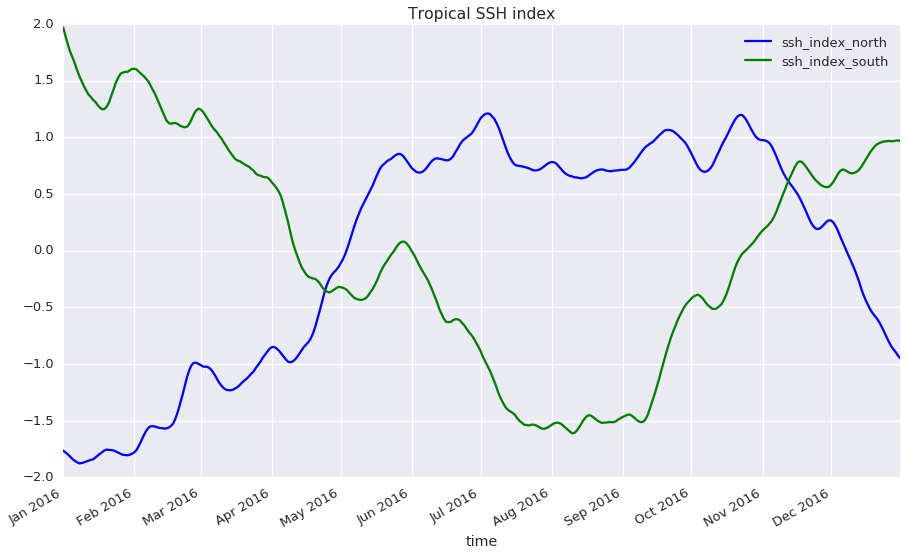

In [7]:
fig, ax = plt.subplots(1, 1)

ssh_index_north.plot(ax=ax);
ssh_index_south.plot(ax=ax);

ax.set_ylabel("");
ax.set_title("Tropical SSH index");
ax.legend(loc=0);

# Save the output data for later reference

In [8]:
output_dataset = xr.Dataset({'ssh_index_north': ssh_index_north, 'ssh_index_south': ssh_index_south})
output_dataset.to_netcdf("fig_01_tropical_ssh_index.nc")

# Version number of the data

In [9]:
!(cd /data/c2/TMdata/git_geomar_de_data/SLTAC_GLO_PHY_L4_REP/v1.x.x/; \
  pwd -P; \
  /home/wrath/TM/software/miniconda3_latest/envs/git/bin/git describe;)

/data/c2/TMdata/git_geomar_de_data/SLTAC_GLO_PHY_L4_REP/v1.x.x
v1.1.0


# Software that was used

In [10]:
!(conda list)

# packages in environment at /home/wrath/TM/software/miniconda3_20170727/envs/py3_std:
#
alabaster                 0.7.10                   py35_1    conda-forge
anaconda-client           1.6.5                      py_0    conda-forge
aospy                     0.1.2                    py35_0    conda-forge
asn1crypto                0.22.0                   py35_0    conda-forge
astroid                   1.5.3                    py35_0    conda-forge
babel                     2.4.0                    py35_0    conda-forge
basemap                   1.1.0                    py35_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
biggus                    0.15.0                   py35_0    conda-forge
bkcharts                  0.2                      py35_0    conda-forge
blas                      1.1                    openblas    conda-forge
bleach                    2.0.0                    py35_0    conda-forge
bokeh                     0.12.6   